Requesting Trump...31.94ms [DONE] Plotting Trump...13.87ms [DONE]


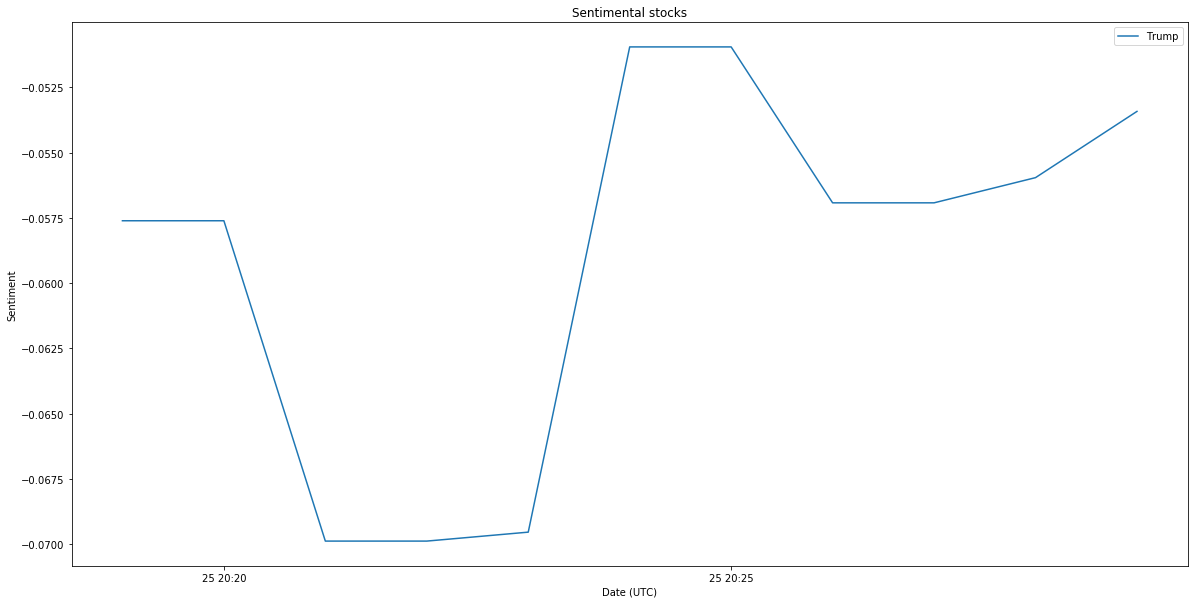

In [13]:
#!/bin/python
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as pltdates
import requests
import time
from scipy import signal

# Get the window of values
hours = 8
before = int(time.time())
after = before - hours*3600

companies = ["Trump"]

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.set_xlabel("Date (UTC)")
ax.set_ylabel("Sentiment")
ax.set_title("Sentimental stocks")

for company in companies:
    print(f"Requesting {company}...", end="")
    start_r = time.time()
    r = requests.get(f"http://localhost:2015/api/sentiments?company={company}&before={before}&after={after}")
    print(f"{round((time.time()-start_r)*1000,2)}ms [\033[92mDONE\033[0m]", end="")
    print(f" Plotting {company}...", end="")
    start_p = time.time()
    values = r.json()
    x_vals = [datetime.fromtimestamp(x[0]) for x in values]
    y_vals = [x[1] for x in values]
    ax.plot_date(pltdates.date2num(x_vals), signal.medfilt(y_vals),
                 label=company, linestyle='solid', marker=None)
    print(f"{round((time.time()-start_p)*1000,2)}ms [\033[92mDONE\033[0m]")

ax.legend()
ax.plot()
plt.show()